## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [804]:
bending = []
testing = []
file_path = "../data/AReM/"
folders = os.listdir(file_path)
for folder in folders:
    if 'pdf' in folder or 'DS_Store' in folder:
        continue
    path = os.path.join(file_path, folder)
    files = os.listdir(path)
    files = sorted(files)
    if folder == 'bending1' or folder == 'bending2':
        for file in files:
            bending.append(1)
            if file == 'dataset1.csv' or file == 'dataset2.csv':
                testing.append(1)
            else:
                testing.append(0)
    else:
        for file in files:
            bending.append(0)
            if file == 'dataset1.csv' or file == 'dataset2.csv' or file == 'dataset3.csv':
                testing.append(1)
            else:
                testing.append(0)
print(bending)
print(testing)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]


In [805]:
df['bending_label'] = bending
df['testing_label'] = testing
df

,min1,max1,mean1,median1,standard deviation1,1st quartile1,3rd quartile1,min2,max2,mean2,...,3rd quartile5,min6,max6,mean6,median6,standard deviation6,1st quartile6,3rd quartile6,bending_label,testing_label
0,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,36.00,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.3000,1,1
1,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,34.50,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.3000,1,1
2,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,36.50,0.0,1.79,0.493292,0.430,0.513506,0.0000,0.9400,1,0
3,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,36.33,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000,1,0
4,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,31.25,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,26.50,44.33,36.687292,36.00,3.529404,34.25,39.3725,0.0,12.89,2.973042,...,18.50,0.0,8.19,3.073313,2.690,1.629675,1.9125,4.0875,0,0
84,25.33,45.00,37.114313,36.25,3.710385,34.50,40.2500,0.0,10.84,2.730000,...,18.50,0.0,9.50,3.076354,2.770,1.824534,1.7000,4.0375,0,0
85,26.75,44.75,36.863375,36.33,3.555787,34.50,39.7500,0.0,11.68,2.757312,...,18.67,0.0,8.81,2.773313,2.590,1.569919,1.6400,3.6325,0,0
86,26.25,44.25,36.957458,36.29,3.434863,34.50,40.2500,0.0,8.64,2.420083,...,18.25,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300,0,0


(69, 44)


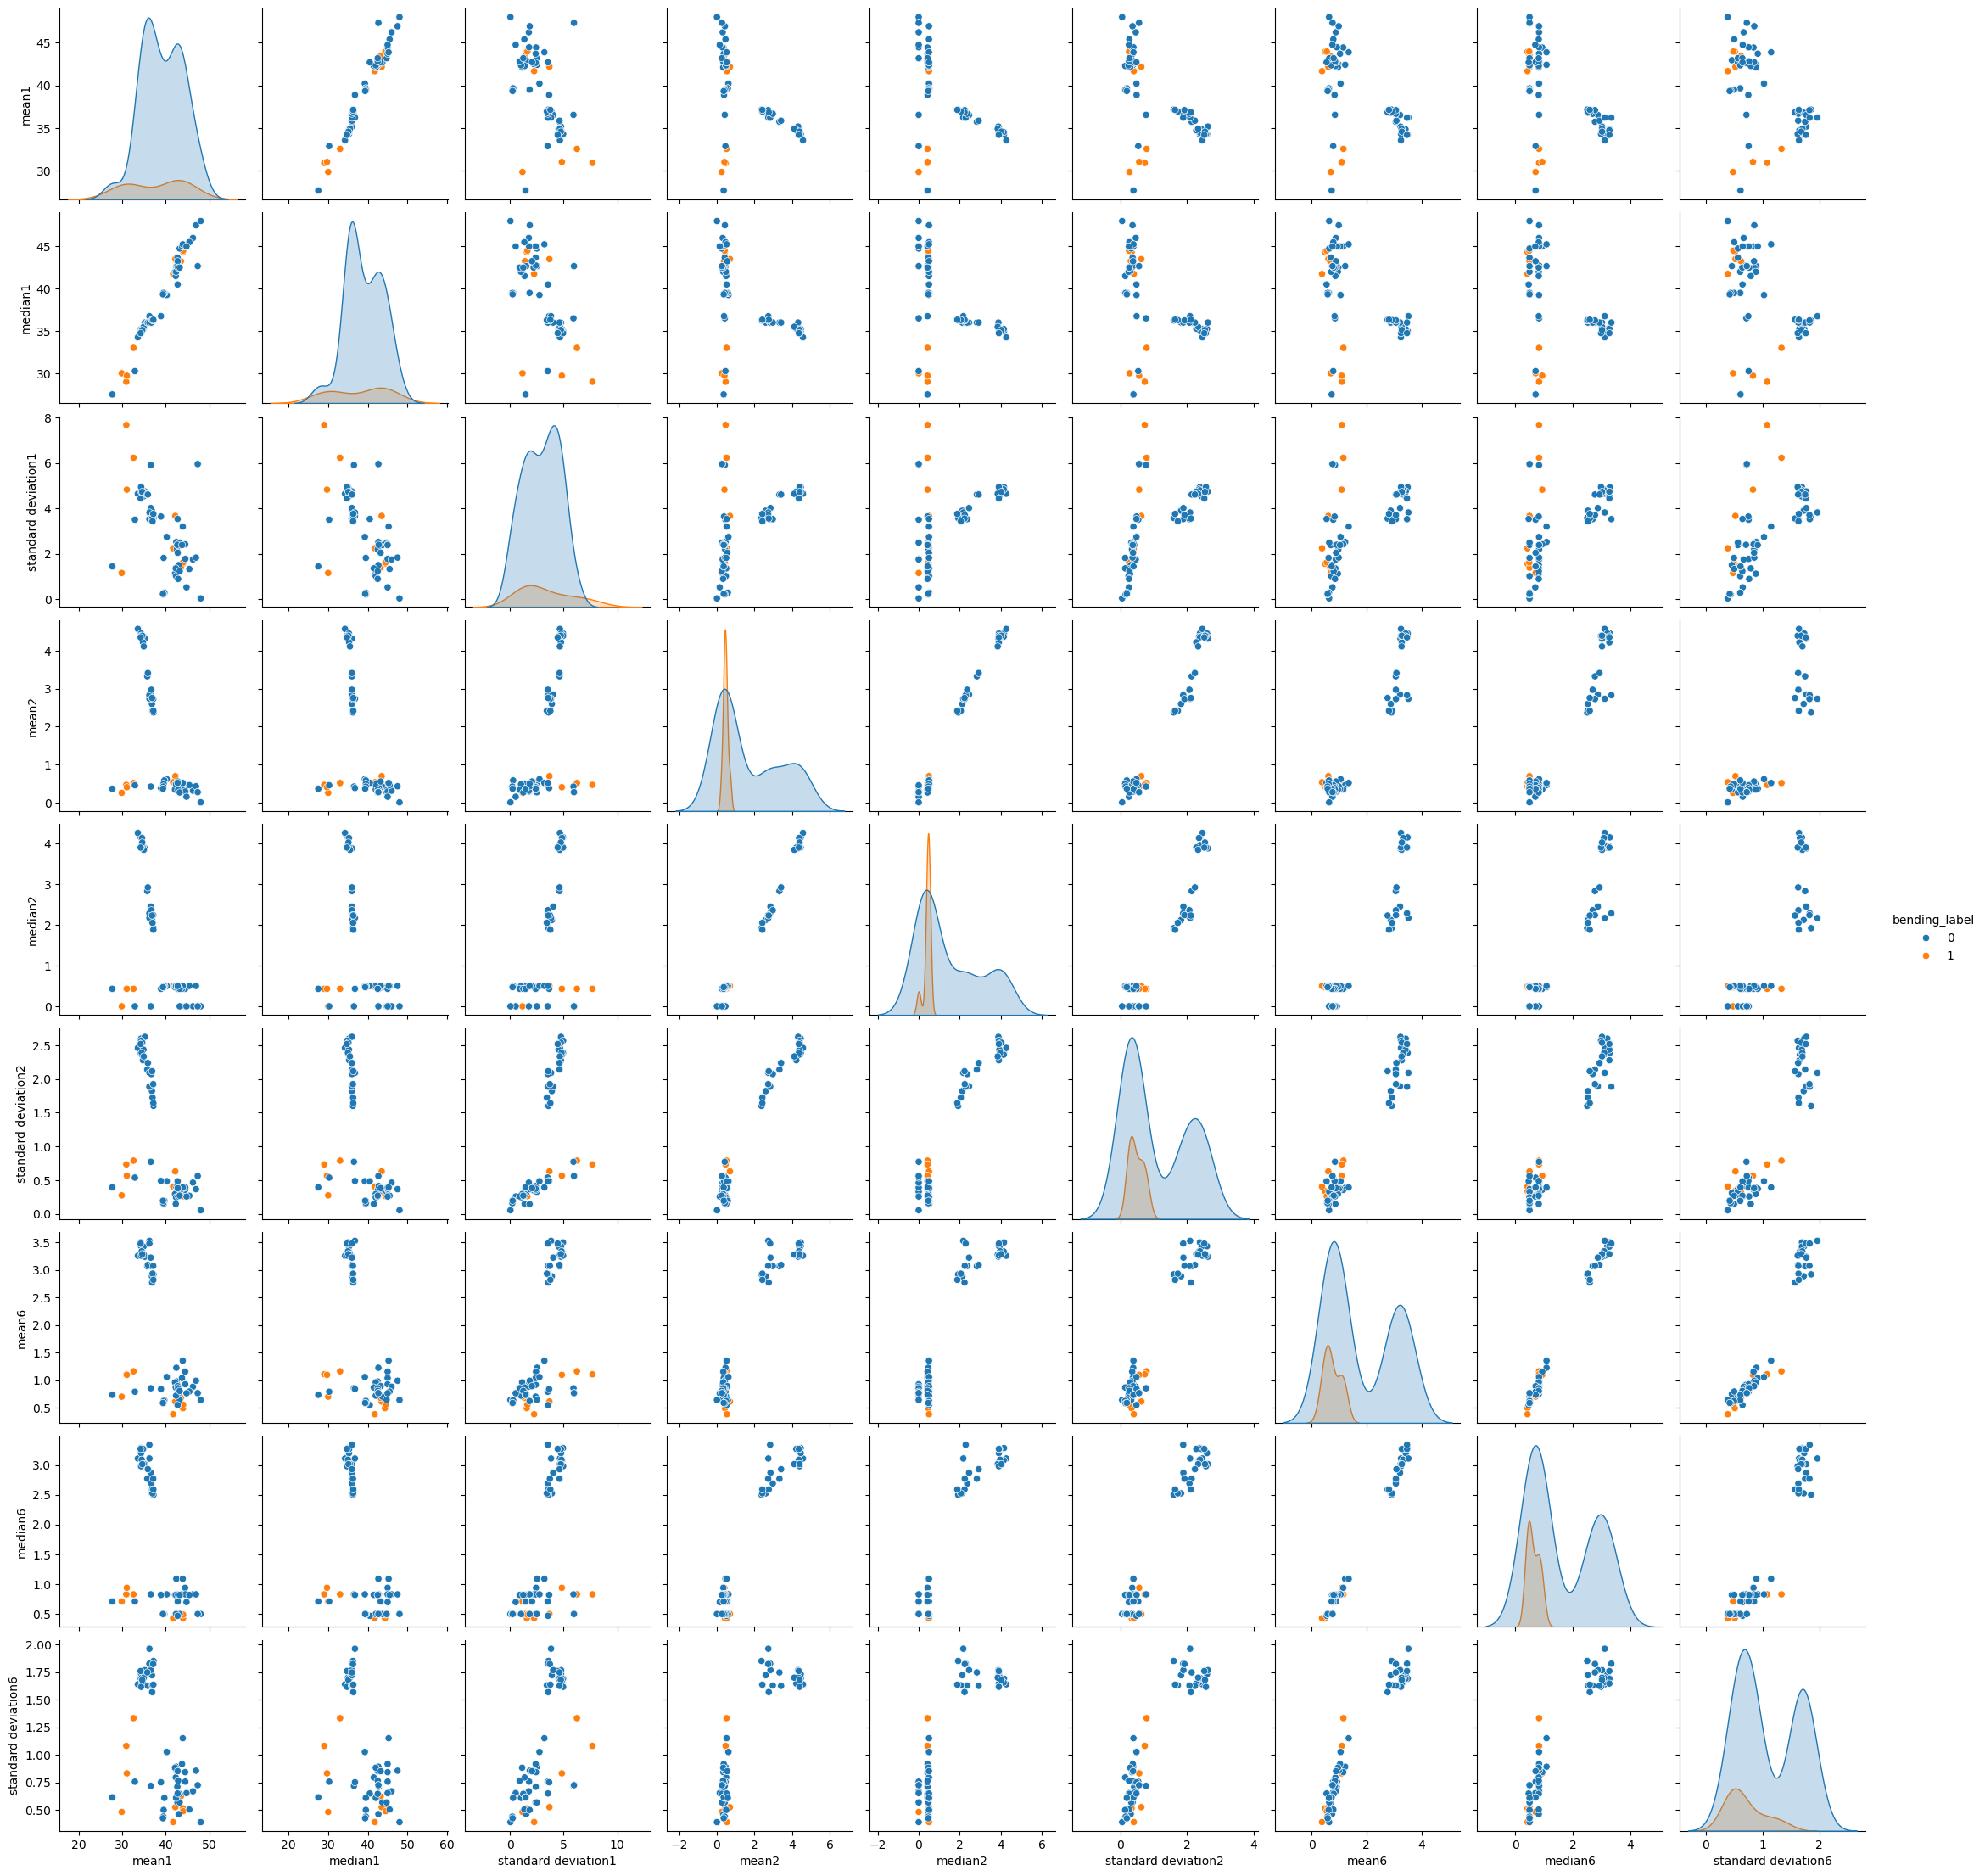

In [806]:
df_feature_train = df.loc[df["testing_label"] == 0]
print(df_feature_train.shape)


features_formatname = ['mean', 'median', 'standard deviation']
col_sub = []
for series_name in [1,2,6]:
    for feature in features_formatname:
        col_sub.append(feature + str(series_name))
col_sub.append("bending_label")

df_feature_126 = df_feature_train[col_sub]

sns.pairplot(df_feature_126, hue="bending_label")
plt.show()

#### ii. Splitted Plots

In [808]:
df_first = df_feature_126[0:math.floor(len(df_feature_train)/2)]
df_first = df_first.reset_index()
df_first = df_first.iloc[:, 1:]

col_rename = {}
for series_name in series_names:
    for feature in features_formatname:
        col_rename[feature + str(series_name)] = (feature + str(series_name) + "_1")
col_rename["bending_label"] = "bending_label"
df_first = df_first.rename(columns=col_rename)
display(df_first)


df_second = df_feature_126[math.floor(len(df_feature_train)/2):-1]
df_second = df_second.reset_index()
df_second = df_second.iloc[:, 1:-1]

col_rename = {}
for series_name in series_names:
    for feature in features_formatname:
        col_rename[feature + str(series_name)] = (feature + str(series_name) + "_2")
df_second = df_second.rename(columns=col_rename)
display(df_second)

,mean1_1,median1_1,standard deviation1_1,mean2_1,median2_1,standard deviation2_1,mean6_1,median6_1,standard deviation6_1,bending_label
0,43.954500,44.330,1.558835,0.426250,0.470,0.338690,0.493292,0.430,0.513506,1
1,42.179812,43.500,3.670666,0.696042,0.500,0.630860,0.613521,0.500,0.524317,1
2,41.678063,41.750,2.243490,0.535979,0.500,0.405469,0.383292,0.430,0.389164,1
3,43.454958,43.250,1.386098,0.378083,0.470,0.315566,0.679646,0.500,0.622534,1
4,43.969125,44.500,1.618364,0.413125,0.470,0.263111,0.555312,0.490,0.487826,1
5,34.253521,35.000,4.940741,4.457896,4.150,2.387192,3.500750,3.285,1.692378,0
6,33.586875,34.250,4.650935,4.576562,4.260,2.461077,3.259729,3.110,1.640243,0
7,34.322750,35.250,4.752477,4.456333,3.900,2.599284,3.432563,3.200,1.732727,0
8,34.546229,35.250,4.842294,4.371958,4.135,2.360448,3.338125,3.080,1.656742,0
9,34.873229,35.250,4.531720,4.380583,3.925,2.435437,3.424646,3.270,1.690960,0


,mean1_2,median1_2,standard deviation1_2,mean2_2,median2_2,standard deviation2_2,mean6_2,median6_2,standard deviation6_2
0,43.884833,45.25,3.198894,0.517354,0.500,0.394064,1.354917,1.090,1.150883
1,42.111583,42.00,1.122245,0.341938,0.470,0.295805,0.961167,0.820,0.882784
2,42.282667,41.50,1.356149,0.498354,0.500,0.147984,0.869000,0.820,0.794213
3,42.360188,42.00,1.017372,0.482500,0.500,0.246389,0.719812,0.500,0.608546
4,42.728854,43.25,2.046362,0.555333,0.500,0.382544,0.892083,0.710,0.851175
5,44.753958,45.00,0.520309,0.153917,0.000,0.258815,0.764083,0.700,0.652091
6,36.560063,36.50,5.915081,0.422167,0.000,0.772992,0.854833,0.830,0.717603
7,32.905979,30.25,3.505776,0.456750,0.000,0.538783,0.791354,0.710,0.755739
8,38.888375,36.75,3.642901,0.383438,0.430,0.488937,0.840208,0.820,0.750636
9,42.821983,42.50,0.891818,0.335678,0.430,0.260357,0.856013,0.820,0.764801


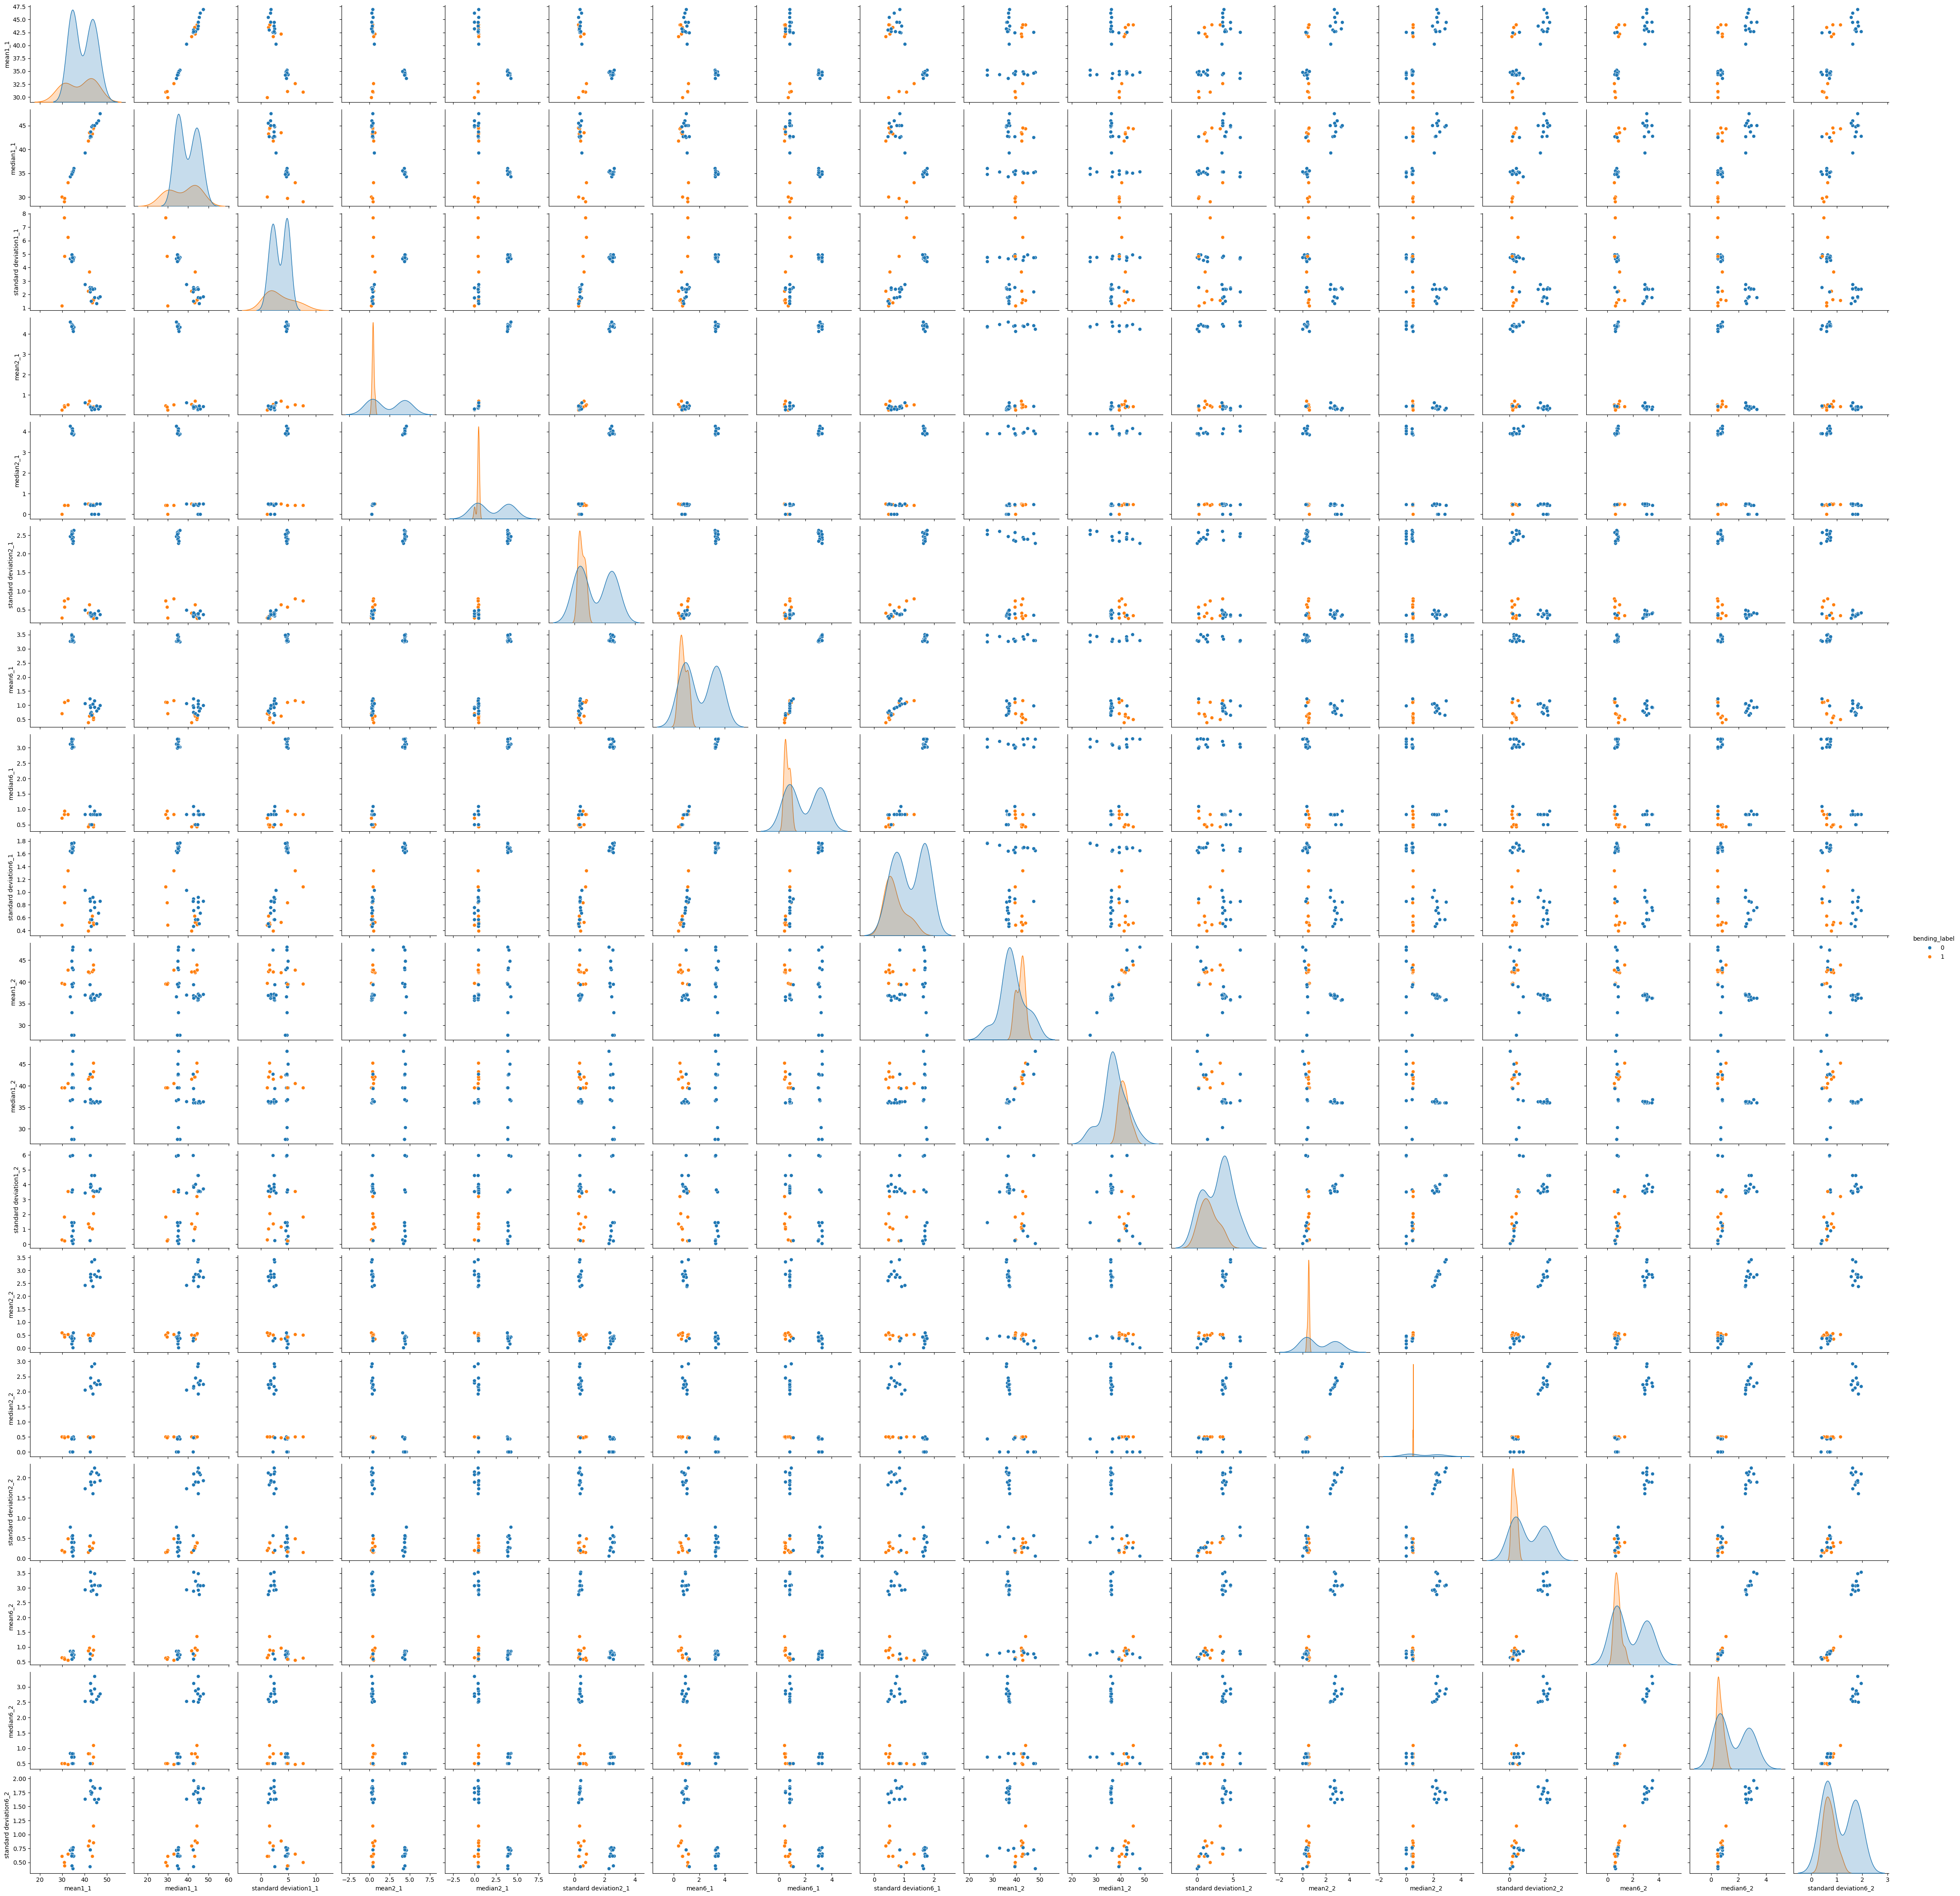

In [809]:
df_partition= pd.concat([df_first, df_second], axis=1)
sns.pairplot(df_partition,hue="bending_label")
plt.show()

We can see slightly clear partition for bending in (a)(iii) than in (a)(ii)

#### iii. Time Series Segments

In [812]:

def important_feature_extraction(FolderName, num_csv, num_test, l):
    train_csv = list()
    test_csv = list()

    for i in range(1, num_test+1):
        path = '../data/ARem/' + str(FolderName) + "/dataset" + str(i) +".csv"
        test_csv.append(path)
    for i in range(num_test+1, num_csv+1):
        path = '../data/ARem/' + str(FolderName) + "/dataset" + str(i) +".csv"
        train_csv.append(path)

    feature_extraction = list() 
    for filename in test_csv:
        df = pd.read_csv(filename, names=csv_header, skiprows=5)
        df = df.drop("time", axis=1) 
        df_split = np.array_split(df, l)

        split_info = list()   
        for df_sub in df_split:
            sub_df_info = list() 
            for series_name in series:
                for feature in features:
                    sub_df_info.append(df_sub.describe()[series_name][feature])
            split_info.extend(sub_df_info)
      
        if (FolderName == "bending1") or (FolderName == "bending2"):
            split_info.append(str(1))
        else:
            split_info.append(str(0))
        split_info.append(str(1))

        df_concat_info = pd.DataFrame(split_info).transpose()
        feature_extraction.append(df_concat_info)
        
    for filename in train_csv:
        df = pd.read_csv(filename, names=csv_header, skiprows=5)
        df = df.drop("time", axis=1)
        df_split = np.array_split(df, l)

        split_info = list()
        for df_sub in df_split:
            sub_df_info = list() 
            for series_name in series:
                for feature in features:
                    sub_df_info.append(df_sub.describe()[series_name][feature])
            split_info.extend(sub_df_info)

        if (FolderName == "bending1") or (FolderName == "bending2"):
            split_info.append(1)
        else:
            split_info.append(0)
        split_info.append(0)

        df_concat_info = pd.DataFrame(split_info).transpose()
        feature_extraction.append(df_concat_info)
    
    return feature_extraction

In [813]:
csv_header = ["time", "avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
series = ["avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
series_formatname = [i for i in range(1, 7)]
features = ['mean', '50%', 'std']
features_formatname = ['mean', 'median', 'std dev']

In [814]:
TimeSeries_size = [i for i in range(1, 21)]
plist = list()
score = list()
other = ["cycling", "lying", "sitting", "standing", "walking"]

for l in TimeSeries_size:
    column_name = list()
    for i in range(1, l+1):
        for series_name in series_formatname:
            for feature in features_formatname:
                column_name.append(feature+str(series_name)+"_"+ str(i))
    column_name.extend(["bending_label", "testing_label"])
    
    important_feature = list()
    important_feature.extend(important_feature_extraction("bending1", 7, 2, l))
    important_feature.extend(important_feature_extraction("bending2", 6, 2, l))
    
    for folder_name in other:
        important_feature.extend(important_feature_extraction(folder_name, 15, 3, l))
   
    df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
    df_important_feature.columns = column_name
    df_important_feature["bending_label"] = df_important_feature["bending_label"].astype('int')

    df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]

    X_train = df_LR_train.iloc[:, :-2]
    Y_train = df_LR_train.iloc[:,-2:-1]
    model = LogisticRegression()
    rfecv = RFECV(estimator = model, cv=StratifiedKFold(5), scoring = 'accuracy')
    rfecv.fit(X_train, Y_train) 
    print("Optimal number of features for l =", l, "is", "%d" % rfecv.n_features_)
    print("Cross-validation score:", np.max(rfecv.cv_results_['mean_test_score']))
    
    plist.append(rfecv.n_features_) 
    score.append(np.max(rfecv.cv_results_['mean_test_score'])) 

Optimal number of features for l = 1 is 6
Cross-validation score: 0.9560439560439562
Optimal number of features for l = 2 is 32
Cross-validation score: 0.9428571428571428
Optimal number of features for l = 3 is 1
Cross-validation score: 0.9571428571428573
Optimal number of features for l = 4 is 51
Cross-validation score: 0.9560439560439562
Optimal number of features for l = 5 is 85
Cross-validation score: 0.956043956043956
Optimal number of features for l = 6 is 1
Cross-validation score: 0.9571428571428573
Optimal number of features for l = 7 is 62
Cross-validation score: 0.9560439560439562
Optimal number of features for l = 8 is 75
Cross-validation score: 0.956043956043956
Optimal number of features for l = 9 is 9
Cross-validation score: 0.9714285714285715
Optimal number of features for l = 10 is 157
Cross-validation score: 0.9714285714285715
Optimal number of features for l = 11 is 56
Cross-validation score: 0.9714285714285715
Optimal number of features for l = 12 is 159
Cross-valida

In [815]:
df_bestp = pd.DataFrame({"l": TimeSeries_size, "p-features": plist, "Score":score})
df_bestp.index = np.arange(1, 21)
df_bestp

,l,p-features,Score
1,1,6,0.956044
2,2,32,0.942857
3,3,1,0.957143
4,4,51,0.956044
5,5,85,0.956044
6,6,1,0.957143
7,7,62,0.956044
8,8,75,0.956044
9,9,9,0.971429
10,10,157,0.971429


<h4>The best (l,p) pair is (12,159) with a score of 0.985714<br>
The right way is to do the Recursive Feature Elimination along with Cross Validation. The wrong way will be doing RFE before performing Cross Validation</h4>

#### iv. Confusion Matrix

In [818]:
#calculate for l = 12
l = 12
column_name = list()
for i in range(1, l+1):
    for series_name in series_formatname:
        for feature in features_formatname:
            column_name.append(feature+"_"+str(series_name)+"_"+ str(i))
column_name.extend(["bending_label", "testing_label"])

important_feature = list()
important_feature.extend(important_feature_extraction("bending1", 7, 2, l))
important_feature.extend(important_feature_extraction("bending2", 6, 2, l))
for folder_name in other:
    important_feature.extend(important_feature_extraction(folder_name, 15, 3, l))

df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
df_important_feature.columns = column_name
df_important_feature = df_important_feature.apply(pd.to_numeric)
df_important_feature["bending_label"] = df_important_feature["bending_label"].astype('int')

df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]
X_train = df_LR_train.iloc[:, :-2]
Y_train = df_LR_train.iloc[:,-2:-1]

model_train = LogisticRegression(solver='liblinear')
rfe = RFE(model_train, n_features_to_select=10)
rfe.fit(X_train, Y_train)
y_pred = rfe.predict(X_train)

model_CM = confusion_matrix(Y_train, y_pred)
print("CONFUSION MATRIX")
print(model_CM)
cols = list(X_train.columns[rfe.support_])

CONFUSION MATRIX
[[60  0]
 [ 0  9]]


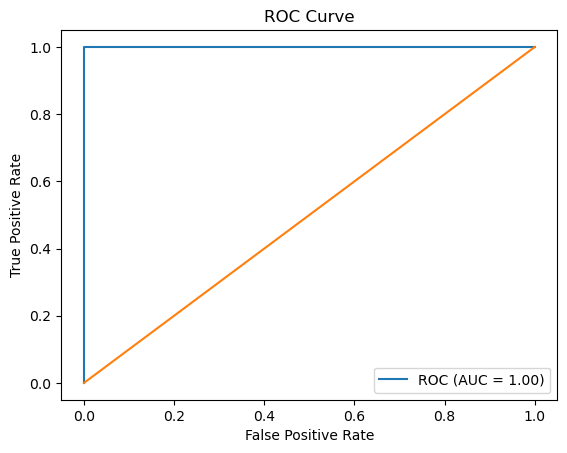

In [819]:
rfe_score = roc_auc_score(Y_train, y_pred)
fpr, tpr, thresholds= roc_curve(Y_train, rfe.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC (AUC = %0.2f)' % rfe_score)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [820]:
print("Cross validation train score",rfe_score)

Cross validation train score 1.0


In [821]:
X_train_new = X_train[cols]
logit_model_selected = sm.Logit(Y_train, X_train_new)
model_selected = logit_model_selected.fit(method = 'lbfgs').summary()
print(model_selected)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.47730D+01

At iterate    1    f=  5.61330D-01    |proj g|=  3.85183D+00

At iterate    2    f=  4.50577D-01    |proj g|=  2.71953D+00

At iterate    3    f=  3.69818D-01    |proj g|=  1.15213D+00

At iterate    4    f=  3.45022D-01    |proj g|=  2.29527D+00

At iterate    5    f=  2.54496D-01    |proj g|=  3.89097D+00

At iterate    6    f=  1.73023D-01    |proj g|=  2.57398D+00

At iterate    7    f=  1.07798D-01    |proj g|=  1.23127D+00

At iterate    8    f=  6.76993D-02    |proj g|=  5.25554D-01

At iterate    9    f=  4.16929D-02    |proj g|=  1.67151D-01

At iterate   10    f=  2.56235D-02    |proj g|=  6.06740D-02

At iterate   11    f=  1.53169D-02    |proj g|=  4.41176D-02

At iterate   12    f=  8.23302D-03    |proj g|=  2.08671D-02

At iterate   13    f=  4.3

 This problem is unconstrained.


<h4>Based on p-value, the data is completely separated</h4>

#### v. Test Classifier

In [824]:
df_LR_test = df_important_feature.loc[df_important_feature['testing_label'] == 1]
X_test = df_LR_test.iloc[:, :-2]
Y_test = df_LR_test.iloc[:,-2:-1]
model_test = LogisticRegression(solver='liblinear')
rfe = RFE(model_test, n_features_to_select=10)
rfe.fit(X_test, Y_test.values.ravel())
y_pred_test = rfe.predict(X_test)
print("Cross-validation test score:", rfe.score(X_test, Y_test))

Cross-validation test score: 1.0


<h4>The accuracy for test and cross-validation are same.</h4>

#### vi. Separation

The p-value analysis using statsmodels indicates complete separation, meaning the Maximum Likelihood Estimator (MLE) does not exist, and the parameters are not identified. This well-separation of classes is likely causing instability in calculating the logistic regression parameters.

#### vii. Imbalance

From the confusion matrix, we can see an imbalance with have high true positive and low true negative.

In [830]:
def oversampling(train_df):
    total0 = train_df.loc[train_df['bending_label'] == 0].shape[0]
    total1 = train_df.loc[train_df['bending_label'] == 1].shape[0]
    minor_label, major_label = (1, 0) if total0 > total1 else (0, 1)
        
    minor_ds = train_df[train_df['bending_label'] == minor_label]
    major_ds = train_df[train_df['bending_label'] == major_label]
    
    minor_ds = resample(minor_ds, replace = True, random_state = 30, n_samples = max(total0, total1))
    train_df = pd.concat([major_ds, minor_ds])
    return train_df
    
TimeSeries_size = [i for i in range(1, 21)]
plist2 = list()
score2 = list()
other = ["cycling", "lying", "sitting", "standing", "walking"]

for l in TimeSeries_size:
    column_name = list()
    for i in range(1, l+1):
        for series_name in series_formatname:
            for feature in features_formatname:
                column_name.append(feature+str(series_name)+"_"+ str(i))
    column_name.extend(["bending_label", "testing_label"])
    
    important_feature = list()
    important_feature.extend(important_feature_extraction("bending1", 7, 2, l))
    important_feature.extend(important_feature_extraction("bending2", 6, 2, l))
    
    for folder_name in other:
        important_feature.extend(important_feature_extraction(folder_name, 15, 3, l))
   
    df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
    df_important_feature.columns = column_name
    df_important_feature["bending_label"] = df_important_feature["bending_label"].astype('int')

    df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]

    #oversampling train data
    df_LR_train = oversampling(df_LR_train)

    X_train = df_LR_train.iloc[:, :-2]
    Y_train = df_LR_train.iloc[:,-2:-1]
    model = LogisticRegression()
    rfecv = RFECV(estimator = model, cv=StratifiedKFold(5), scoring = 'accuracy')
    rfecv.fit(X_train, Y_train) 
    print("Optimal number of features for l =", l, "is", "%d" % rfecv.n_features_)
    print("Cross-validation score:", np.max(rfecv.cv_results_['mean_test_score']))
    
    plist2.append(rfecv.n_features_) 
    score2.append(np.max(rfecv.cv_results_['mean_test_score'])) 

Optimal number of features for l = 1 is 7
Cross-validation score: 0.9666666666666668
Optimal number of features for l = 2 is 8
Cross-validation score: 0.975
Optimal number of features for l = 3 is 8
Cross-validation score: 0.9916666666666668
Optimal number of features for l = 4 is 29
Cross-validation score: 0.9833333333333334
Optimal number of features for l = 5 is 14
Cross-validation score: 0.9916666666666668
Optimal number of features for l = 6 is 7
Cross-validation score: 0.9833333333333334
Optimal number of features for l = 7 is 28
Cross-validation score: 0.9833333333333334
Optimal number of features for l = 8 is 7
Cross-validation score: 0.9833333333333334
Optimal number of features for l = 9 is 4
Cross-validation score: 0.9916666666666668
Optimal number of features for l = 10 is 11
Cross-validation score: 0.9916666666666668
Optimal number of features for l = 11 is 4
Cross-validation score: 1.0
Optimal number of features for l = 12 is 3
Cross-validation score: 0.9916666666666668
O

In [831]:
#calculate for l = 11
l = 11
column_name = list()
for i in range(1, l+1):
    for series_name in series_formatname:
        for feature in features_formatname:
            column_name.append(feature+str(series_name)+"_"+ str(i))
column_name.extend(["bending_label", "testing_label"])

important_feature = list()
important_feature.extend(important_feature_extraction("bending1", 7, 2, l))
important_feature.extend(important_feature_extraction("bending2", 6, 2, l))
for folder_name in other:
    important_feature.extend(important_feature_extraction(folder_name, 15, 3, l))

df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
df_important_feature.columns = column_name
df_important_feature = df_important_feature.apply(pd.to_numeric)
df_important_feature["bending_label"] = df_important_feature["bending_label"].astype('int')

df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]
X_train = df_LR_train.iloc[:, :-2]
Y_train = df_LR_train.iloc[:,-2:-1]

model_train = LogisticRegression(solver='liblinear')
rfe = RFE(model_train, n_features_to_select=11)
rfe.fit(X_train, Y_train)
y_pred = rfe.predict(X_train)

model_CM = confusion_matrix(Y_train, y_pred)
print("CONFUSION MATRIX")
print(model_CM)
cols = list(X_train.columns[rfe.support_])

CONFUSION MATRIX
[[60  0]
 [ 0  9]]


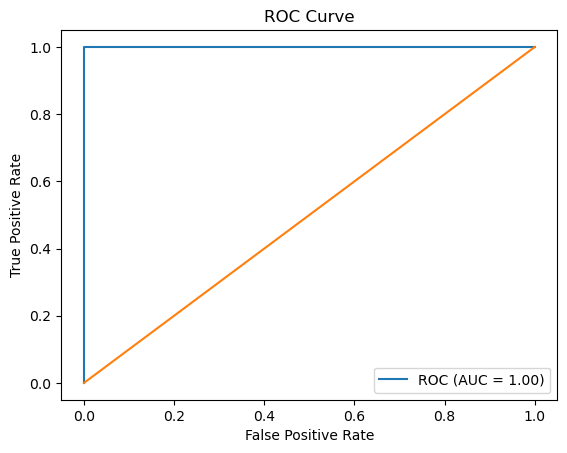

In [832]:
rfe_score = roc_auc_score(Y_train, y_pred)
fpr, tpr, thresholds= roc_curve(Y_train, rfe.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC (AUC = %0.2f)' % rfe_score)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [835]:
TimeSeries_size = [i for i in range(1, 21)]
plist = list()
score = list()
other = ["cycling", "lying", "sitting", "standing", "walking"]

for l in TimeSeries_size:
    column_name = list()
    for i in range(1, l+1):
        for series_name in series_formatname:
            for feature in features_formatname:
                column_name.append(feature+str(series_name)+"_"+ str(i))
    column_name.extend(["bending_label", "testing_label"])
    
    important_feature = list()
    important_feature.extend(important_feature_extraction("bending1", 7, 2, l))
    important_feature.extend(important_feature_extraction("bending2", 6, 2, l))
    
    for folder_name in other:
        important_feature.extend(important_feature_extraction(folder_name, 15, 3, l))
   
    df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
    df_important_feature.columns = column_name
    df_important_feature["bending_label"] = df_important_feature["bending_label"].astype('int')

    df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]

    X_train = df_LR_train.iloc[:, :-2]
    Y_train = df_LR_train.iloc[:,-2:-1]

    scalar = StandardScaler()
    X_train_fit = scalar.fit_transform(X_train)

    parameters = {'C': np.linspace(1, 10, 10) }
    mod_lr = LogisticRegression()
    clf = GridSearchCV(mod_lr, parameters, cv=5)
    clf.fit(X_train_fit, Y_train)

    sel_ = SelectFromModel(LogisticRegression(C= (1/clf.best_params_.get('C')), penalty='l1', solver='liblinear'))
    sel_.fit(X_train_fit, Y_train)
    print("At l =", i)
    selected_feat = X_train.columns[(sel_.get_support())]
    print(' features: {}'.format(len(selected_feat)))
    print('Best score:', clf.best_score_)
    plist.append(len(selected_feat))
    score.append(clf.best_score_)
    

At l = 1
 features: 7
Best score: 0.9274725274725275
At l = 2
 features: 6
Best score: 0.9428571428571428
At l = 3
 features: 6
Best score: 0.9131868131868132
At l = 4
 features: 8
Best score: 0.9274725274725275
At l = 5
 features: 9
Best score: 0.9131868131868132
At l = 6
 features: 9
Best score: 0.9131868131868132
At l = 7
 features: 11
Best score: 0.9274725274725275
At l = 8
 features: 14
Best score: 0.9131868131868132
At l = 9
 features: 13
Best score: 0.9131868131868132
At l = 10
 features: 2
Best score: 0.9131868131868132
At l = 11
 features: 10
Best score: 0.9131868131868132
At l = 12
 features: 7
Best score: 0.9131868131868132
At l = 13
 features: 7
Best score: 0.9131868131868132
At l = 14
 features: 9
Best score: 0.9131868131868132
At l = 15
 features: 13
Best score: 0.9274725274725275
At l = 16
 features: 7
Best score: 0.9274725274725275
At l = 17
 features: 14
Best score: 0.9131868131868132
At l = 18
 features: 11
Best score: 0.9274725274725275
At l = 19
 features: 9
Best sc

In [836]:
#calculate for l = 2
l = 2
column_name = list()
for i in range(1, l+1):
    for series_name in series_formatname:
        for feature in features_formatname:
            column_name.append(feature+str(series_name)+"_"+ str(i))
column_name.extend(["bending_label", "testing_label"])

important_feature = list()
important_feature.extend(important_feature_extraction("bending1", 7, 2, l))
important_feature.extend(important_feature_extraction("bending2", 6, 2, l))
for folder_name in other:
    important_feature.extend(important_feature_extraction(folder_name, 15, 3, l))

df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
df_important_feature.columns = column_name
df_important_feature = df_important_feature.apply(pd.to_numeric)
df_important_feature["bending_label"] = df_important_feature["bending_label"].astype('int')

df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]
X_train = df_LR_train.iloc[:, :-2]
Y_train = df_LR_train.iloc[:,-2:-1]

model_train = LogisticRegression(solver='liblinear')
rfe = RFE(model_train, n_features_to_select= 6)
rfe.fit(X_train, Y_train)
y_pred = rfe.predict(X_train)

model_clf = confusion_matrix(Y_train, y_pred)
print("CONFUSION MATRIX")
print(model_clf)

CONFUSION MATRIX
[[60  0]
 [ 0  9]]


In [838]:
cols = list(X_train.columns[rfe.support_])
X_train_new = X_train[cols]
logit_model_selected = sm.Logit(Y_train, X_train_new)
model_selected = logit_model_selected.fit(method = 'lbfgs').summary()
print(model_selected)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.47777D+01

At iterate    1    f=  4.38080D-01    |proj g|=  2.71942D+00

At iterate    2    f=  4.00677D-01    |proj g|=  1.88329D+00

At iterate    3    f=  3.76568D-01    |proj g|=  2.50403D+00

At iterate    4    f=  3.62694D-01    |proj g|=  9.55047D-01

At iterate    5    f=  3.39029D-01    |proj g|=  1.12166D+00

At iterate    6    f=  2.40303D-01    |proj g|=  1.29668D+00

At iterate    7    f=  1.50973D-01    |proj g|=  6.98715D-01

At iterate    8    f=  1.13673D-01    |proj g|=  4.07767D-01

At iterate    9    f=  7.98841D-02    |proj g|=  1.40565D-01

At iterate   10    f=  6.03964D-02    |proj g|=  9.09678D-02

At iterate   11    f=  5.11217D-02    |proj g|=  1.98380D-01

At iterate   12    f=  4.58649D-02    |proj g|=  2.08006D-01

At iterate   13    f=  4.3

 This problem is unconstrained.


#### ii. Comparison

The p-values are same for both the models. The L1-regularization is comparatively easier to implement than the previous model.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [840]:
rev_classes_dict = {1: 'bending1', 2: 'bending2', 3: 'cycling', 4: 'lying', 5: 'sitting', 6: 'standing', 7: 'walking'}
binary_class_dict = {1: 'bending', 0: 'non-bending'}
def plot_roc(true_y, pred_y_prob, model):
    
    _, axes = plt.subplots(figsize = (8, 6))
    axes.set_title("ROC curves")
    for i, class_ in enumerate(model.classes_):
        y_pred = pred_y_prob[:, i]
        fpr, tpr, thresholds = roc_curve(true_y, y_pred, pos_label = class_)
        roc_auc = auc(fpr, tpr)
        if (len(model.classes_) == 2):
            axes.plot(fpr, tpr, label = "Class: {}; AUC: {}".format(binary_class_dict[class_], round(roc_auc, 4)))
        else: 
            axes.plot(fpr, tpr, label = "Class: {}; AUC: {}".format(rev_classes_dict[class_], round(roc_auc, 4)))
    
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

In [844]:
def important_feature_extraction_multiclass(FolderName, num_csv, num_test, l):
    train_csv = list()
    test_csv = list()

    for i in range(1, num_test+1):
        path = '../data/ARem/' + FolderName + "/dataset" + str(i) +".csv"
        test_csv.append(path)
    for i in range(num_test+1, num_csv+1):
        path = '../data/ARem/' + FolderName + "/dataset" + str(i) +".csv"
        train_csv.append(path)

    feature_extraction = list()
    for filename in test_csv:
        df = pd.read_csv(filename, names=csv_header, skiprows=5)
        df = df.drop("time", axis=1)
        df_split = np.array_split(df, l)

        split_info = list() 
        for df_sub in df_split:
            sub_df_info = list()
            for series_name in series:
                for feature in features:
                    sub_df_info.append(df_sub.describe()[series_name][feature])

            split_info.extend(sub_df_info) 
        if FolderName == "bending1":
            split_info.append(str(1))
        elif FolderName == "bending2":
            split_info.append(str(2))
        elif FolderName == "cycling":
            split_info.append(str(3))
        elif FolderName == "lying":
            split_info.append(str(4))
        elif FolderName == "sitting":
            split_info.append(str(5))
        elif FolderName == "standing":
            split_info.append(str(6))
        elif FolderName == "walking":
            split_info.append(str(7))

        split_info.append(str(1))
        df_concat_info = pd.DataFrame(split_info).transpose()
        feature_extraction.append(df_concat_info)
 
    for filename in train_csv:
        df = pd.read_csv(filename, names=csv_header, skiprows=5)
        df = df.drop("time", axis=1) 
        df_split = np.array_split(df, l)

        split_info = list() 
        for df_sub in df_split:
            sub_df_info = list()  
            for series_name in series:
                for feature in features:
                    sub_df_info.append(df_sub.describe()[series_name][feature])

            split_info.extend(sub_df_info) 
        if FolderName == "bending1":
            split_info.append(str(1))
        elif FolderName == "bending2":
            split_info.append(str(2))
        elif FolderName == "cycling":
            split_info.append(str(3))
        elif FolderName == "lying":
            split_info.append(str(4))
        elif FolderName == "sitting":
            split_info.append(str(5))
        elif FolderName == "standing":
            split_info.append(str(6))
        elif FolderName == "walking":
            split_info.append(str(7))

        split_info.append(0)
        df_concat_info = pd.DataFrame(split_info).transpose()
        feature_extraction.append(df_concat_info)
    
    return feature_extraction

In [846]:

TimeSeries_size = [i for i in range(1, 21)]
for l in TimeSeries_size:
    # Format column names
    column_name = list()
    for i in range(1, l+1):
        for series_name in series_formatname:
            for feature in features_formatname:
                column_name.append(feature+"_"+str(series_name)+"_"+ str(i))
    column_name.extend(["class_label", "testing_label"])
    
    important_feature = list()
    important_feature.extend(important_feature_extraction_multiclass("bending1", 7, 2, l))
    important_feature.extend(important_feature_extraction_multiclass("bending2", 6, 2, l))
    for folder_name in other:
        important_feature.extend(important_feature_extraction_multiclass(folder_name, 15, 3, l))

    df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
    df_important_feature.columns = column_name
    df_important_feature["class_label"] = df_important_feature["class_label"].astype('int')
    df_important_feature["testing_label"] = df_important_feature["testing_label"].astype('int')
    df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]

    X_train = df_LR_train.iloc[:, :-2]
    Y_train = df_LR_train.iloc[:,-2:-1]
    scalar = StandardScaler()
    X_train_fit = scalar.fit_transform(X_train)

    parameters = {'C': np.linspace(1, 10, 10) }
    mod_lr = LogisticRegression()
    clf = GridSearchCV(mod_lr, parameters, cv=5)
    clf.fit(X_train_fit, Y_train)

    sel_ = SelectFromModel(LogisticRegression(C=(1/clf.best_params_.get('C')), 
                                              multi_class='multinomial', 
                                              penalty='l1', 
                                              solver='saga'))
    sel_.fit(X_train_fit, Y_train)
    print("At l =", i)
    selected_feat = X_train.columns[(sel_.get_support())]
    print('features: {}'.format(len(selected_feat)))
    print('Best score:', clf.best_score_)

At l = 1
features: 13
Best score: 0.9428571428571428
At l = 2
features: 25
Best score: 0.9
At l = 3
features: 33
Best score: 0.8692307692307691
At l = 4
features: 46
Best score: 0.8549450549450549
At l = 5
features: 19
Best score: 0.8692307692307691
At l = 6
features: 61
Best score: 0.8538461538461538
At l = 7
features: 29
Best score: 0.8252747252747253
At l = 8
features: 103
Best score: 0.8263736263736263
At l = 9
features: 98
Best score: 0.8417582417582418
At l = 10
features: 127
Best score: 0.8406593406593407
At l = 11
features: 29
Best score: 0.7824175824175824
At l = 12
features: 157
Best score: 0.7978021978021979
At l = 13
features: 55
Best score: 0.8263736263736263
At l = 14
features: 181
Best score: 0.8120879120879121
At l = 15
features: 192
Best score: 0.8395604395604396
At l = 16
features: 48
Best score: 0.7824175824175824
At l = 17
features: 231
Best score: 0.7824175824175824
At l = 18
features: 179
Best score: 0.8274725274725274
At l = 19
features: 140
Best score: 0.7835164

<h4>The pair (1,13) gives the best score 0.9428571428571428</h4>

#### ii. Naive Bayes

In [850]:
# Naive Bayes' classifier - Gaussian
TimeSeries_size = [i for i in range(1, 21)]

for l in TimeSeries_size:
    column_name = list()
    for i in range(1, l+1):
        for series_name in series_formatname:
            for feature in features_formatname:
                column_name.append(feature+"_"+str(series_name)+"_"+ str(i))
    column_name.extend(["class_label", "testing_label"])
    
    important_feature = list()
    important_feature.extend(important_feature_extraction_multiclass("bending1", 7, 2, l))
    important_feature.extend(important_feature_extraction_multiclass("bending2", 6, 2, l))
    for folder_name in other:
        important_feature.extend(important_feature_extraction_multiclass(folder_name, 15, 3, l))
    df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
    df_important_feature.columns = column_name
    df_important_feature["class_label"] = df_important_feature["class_label"].astype('int')
    df_important_feature["testing_label"] = df_important_feature["testing_label"].astype('int')

    df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]
    X_train = df_LR_train.iloc[:, :-2]
    Y_train = df_LR_train.iloc[:,-2:-1]

    df_LR_test = df_important_feature.loc[df_important_feature['testing_label'] == 1]
    X_test = df_LR_test.iloc[:, :-2]
    Y_test = df_LR_test.iloc[:,-2:-1]
    
    Gau_clf = GaussianNB()
    Gau_clf.fit(X_train, Y_train)
    print("At l =", l)
    print("Score: ", score[l-1])

At l = 1
Score:  0.9274725274725275
At l = 2
Score:  0.9428571428571428
At l = 3
Score:  0.9131868131868132
At l = 4
Score:  0.9274725274725275
At l = 5
Score:  0.9131868131868132
At l = 6
Score:  0.9131868131868132
At l = 7
Score:  0.9274725274725275
At l = 8
Score:  0.9131868131868132
At l = 9
Score:  0.9131868131868132
At l = 10
Score:  0.9131868131868132
At l = 11
Score:  0.9131868131868132
At l = 12
Score:  0.9131868131868132
At l = 13
Score:  0.9131868131868132
At l = 14
Score:  0.9131868131868132
At l = 15
Score:  0.9274725274725275
At l = 16
Score:  0.9274725274725275
At l = 17
Score:  0.9131868131868132
At l = 18
Score:  0.9274725274725275
At l = 19
Score:  0.9131868131868132
At l = 20
Score:  0.9131868131868132


<h4>The best l is 1,3,4,5 with score 0.842 for Gaussian </h4>

Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [0 1 0 0 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 0 3]]
ROC Curve for Train Data


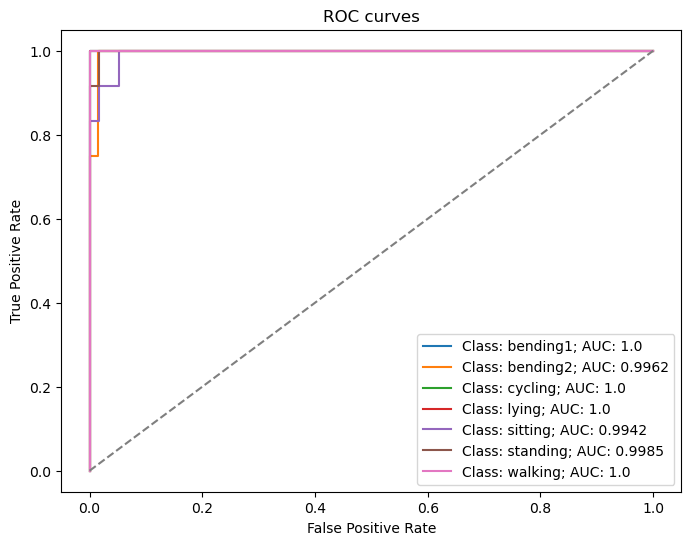

ROC Curve for Test Data


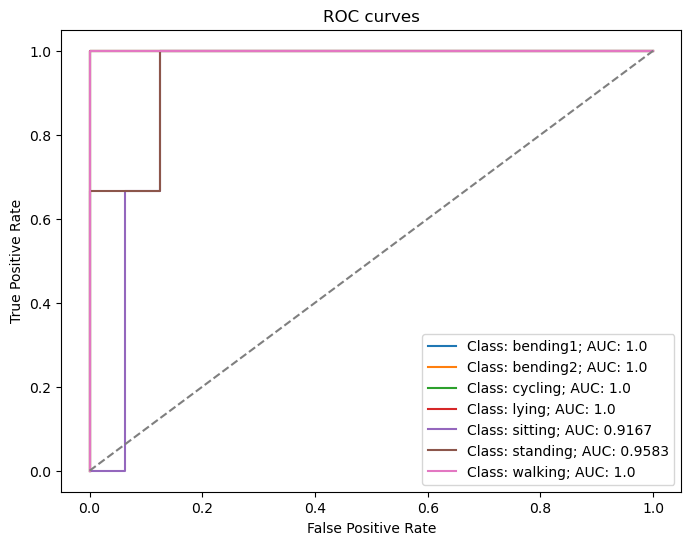

Confusion matrix for test data:
[[0 0 0 0 2 0 0]
 [0 1 0 0 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 0 3]]
ROC Curve for Train Data


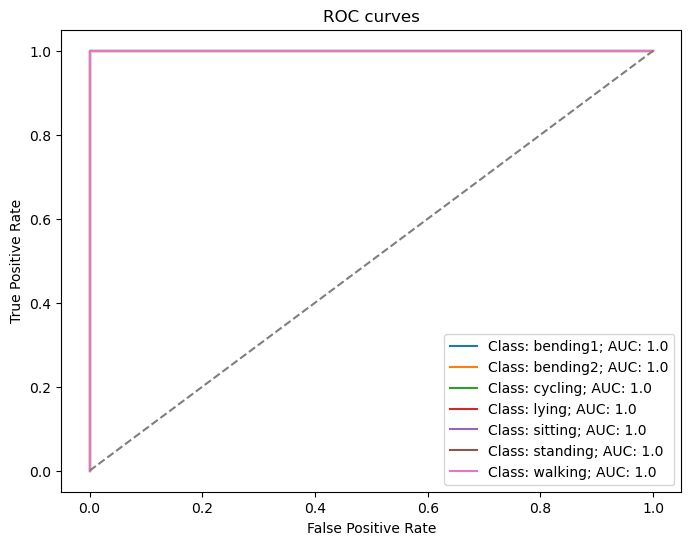

ROC Curve for Test Data


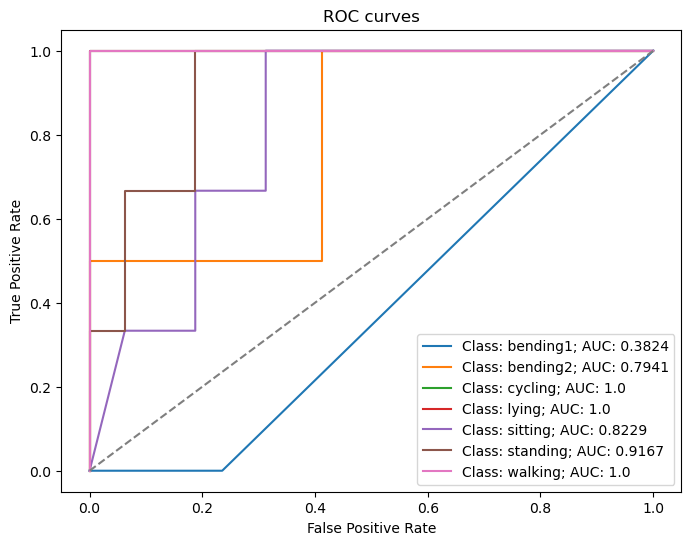

In [851]:
for l in (1,2):
   
    column_name = list()
    for i in range(1, l+1):
        for series_name in series_formatname:
            for feature in features_formatname:
                column_name.append(feature+"_"+str(series_name)+"_"+ str(i))
    column_name.extend(["class_label", "testing_label"])
    
    important_feature = list()
    important_feature.extend(important_feature_extraction_multiclass("bending1", 7, 2, l))
    important_feature.extend(important_feature_extraction_multiclass("bending2", 6, 2, l))
    for folder_name in other:
        important_feature.extend(important_feature_extraction_multiclass(folder_name, 15, 3, l))
        
    df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
    df_important_feature.columns = column_name
    df_important_feature["class_label"] = df_important_feature["class_label"].astype('int')
    df_important_feature["testing_label"] = df_important_feature["testing_label"].astype('int')
   
    df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]
    X_train = df_LR_train.iloc[:, :-2]
    Y_train = df_LR_train.iloc[:,-2:-1]
    df_LR_test = df_important_feature.loc[df_important_feature['testing_label'] == 1]

    X_test = df_LR_test.iloc[:, :-2]
    Y_test = df_LR_test.iloc[:,-2:-1]
    
    Gau_clf = GaussianNB()
    Gau_clf.fit(X_train, Y_train)
    train_predict = Gau_clf.predict_proba(X_train)
    test_predict = Gau_clf.predict_proba(X_test)
    pred_y = Gau_clf.predict(X_test)
    cm = confusion_matrix(Y_test, pred_y)
        
    print("Confusion matrix for test data:\n{}".format(cm))
    print("ROC Curve for Train Data")
    plot_roc(Y_train, train_predict, Gau_clf)
    print("ROC Curve for Test Data")
    plot_roc(Y_test, test_predict, Gau_clf)

In [852]:
# Naive Bayes' classifier - Multinomial

TimeSeries_size = [i for i in range(1, 21)]

for l in TimeSeries_size:
    column_name = list()
    for i in range(1, l+1):
        for series_name in series_formatname:
            for feature in features_formatname:
                column_name.append(feature+"_"+str(series_name)+"_"+ str(i))

    column_name.extend(["class_label", "testing_label"])
    
    important_feature = list()
    important_feature.extend(important_feature_extraction_multiclass("bending1", 7, 2, l))
    important_feature.extend(important_feature_extraction_multiclass("bending2", 6, 2, l))
    for folder_name in other:
        important_feature.extend(important_feature_extraction_multiclass(folder_name, 15, 3, l))
        
    df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)
    df_important_feature.columns = column_name
    df_important_feature["class_label"] = df_important_feature["class_label"].astype('int')
    df_important_feature["testing_label"] = df_important_feature["testing_label"].astype('int')

    df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]
    X_train = df_LR_train.iloc[:, :-2]
    Y_train = df_LR_train.iloc[:,-2:-1]
    df_LR_test = df_important_feature.loc[df_important_feature['testing_label'] == 1]
    X_test = df_LR_test.iloc[:, :-2]
    Y_test = df_LR_test.iloc[:,-2:-1]
    Multi_clf = MultinomialNB()
    Multi_clf.fit(X_train, Y_train)
  
    print("At l =", l)
    print("Score: ", score[l-1])

At l = 1
Score:  0.9274725274725275
At l = 2
Score:  0.9428571428571428
At l = 3
Score:  0.9131868131868132
At l = 4
Score:  0.9274725274725275
At l = 5
Score:  0.9131868131868132
At l = 6
Score:  0.9131868131868132
At l = 7
Score:  0.9274725274725275
At l = 8
Score:  0.9131868131868132
At l = 9
Score:  0.9131868131868132
At l = 10
Score:  0.9131868131868132
At l = 11
Score:  0.9131868131868132
At l = 12
Score:  0.9131868131868132
At l = 13
Score:  0.9131868131868132
At l = 14
Score:  0.9131868131868132
At l = 15
Score:  0.9274725274725275
At l = 16
Score:  0.9274725274725275
At l = 17
Score:  0.9131868131868132
At l = 18
Score:  0.9274725274725275
At l = 19
Score:  0.9131868131868132
At l = 20
Score:  0.9131868131868132


<h4>The best l is 3,11,12,15,16 with score 0.894 for Multinomial </h4>

Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]
ROC Curve for Train Data


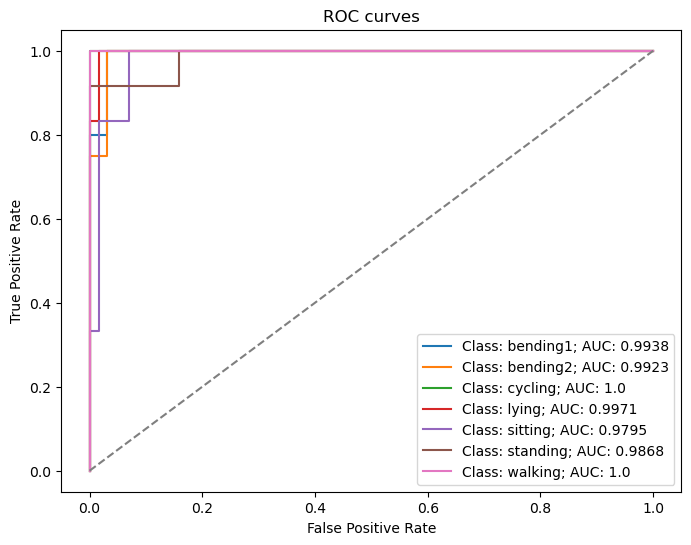

ROC Curve for Test Data


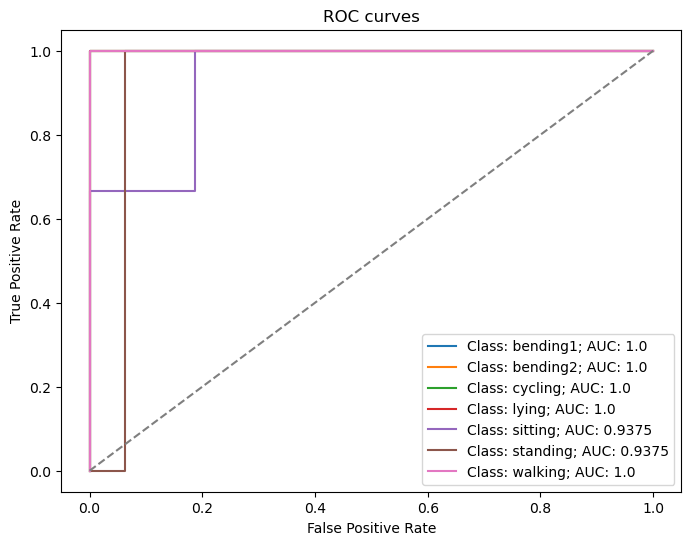

Confusion matrix for test data:
[[2 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]
ROC Curve for Train Data


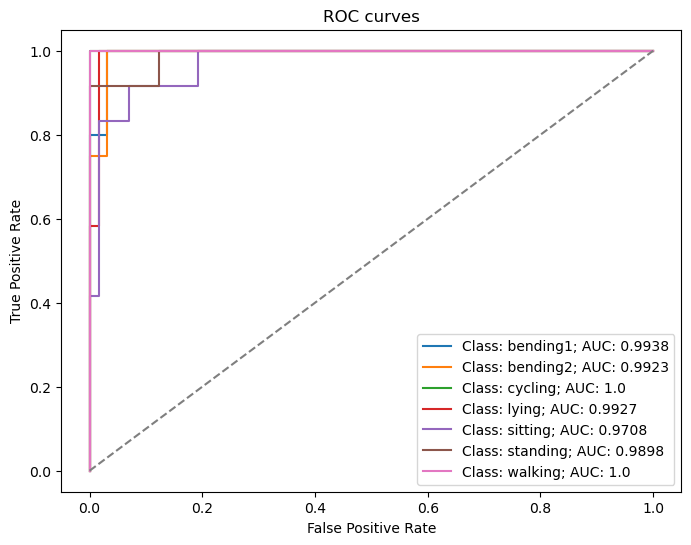

ROC Curve for Test Data


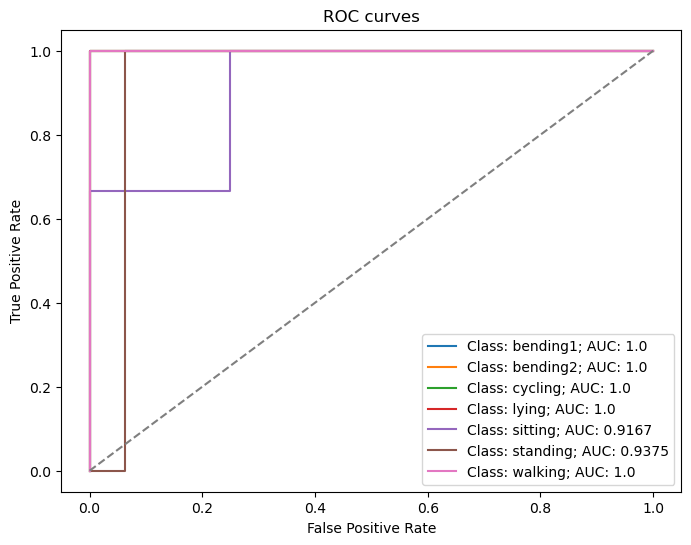

In [853]:


for l in (3,4):
  
    column_name = list()
    for i in range(1, l+1):
        for series_name in series_formatname:
            for feature in features_formatname:
                column_name.append(feature+"_"+str(series_name)+"_"+ str(i))

 
    column_name.extend(["class_label", "testing_label"])
    
    important_feature = list()
 
    important_feature.extend(important_feature_extraction_multiclass("bending1", 7, 2, l))

    important_feature.extend(important_feature_extraction_multiclass("bending2", 6, 2, l))

    for folder_name in other:
        important_feature.extend(important_feature_extraction_multiclass(folder_name, 15, 3, l))
        

    df_important_feature = pd.concat(important_feature, axis=0, ignore_index=True)

    df_important_feature.columns = column_name

    df_important_feature["class_label"] = df_important_feature["class_label"].astype('int')
    df_important_feature["testing_label"] = df_important_feature["testing_label"].astype('int')

    df_LR_train = df_important_feature.loc[df_important_feature['testing_label'] == 0]

    X_train = df_LR_train.iloc[:, :-2]
    Y_train = df_LR_train.iloc[:,-2:-1]

    df_LR_test = df_important_feature.loc[df_important_feature['testing_label'] == 1]

    X_test = df_LR_test.iloc[:, :-2]
    Y_test = df_LR_test.iloc[:,-2:-1]
    

    Multi_clf = MultinomialNB()
    Multi_clf.fit(X_train, Y_train)
    train_predict = Multi_clf.predict_proba(X_train)
    test_predict = Multi_clf.predict_proba(X_test)
    pred_y = Multi_clf.predict(X_test)
    cm = confusion_matrix(Y_test, pred_y)
        
    print("Confusion matrix for test data:\n{}".format(cm))
    print("ROC Curve for Train Data")
    plot_roc(Y_train, train_predict, Multi_clf)
    print("ROC Curve for Test Data")
    plot_roc(Y_test, test_predict, Multi_clf)